In [ ]:
# Stock Market Data Analysis

### Introduction
In this notebook, I am working with stock price data (CSV file).  
The dataset records how a particular company’s stock behaved on different dates.  
Each row represents one day of trading activity, and the columns tell us the following:

- **Date** → The calendar date of trading.  
- **Open** → Price at which the stock started trading on that day.  
- **High** → The highest price reached during the day.  
- **Low** → The lowest price touched during the day.  
- **Close** → The final price at which the stock traded before the market closed.  
- **Adj Close** → The closing price adjusted for events like dividends or stock splits (this is usually more accurate to track performance).  
- **Volume** → The total number of shares traded on that day.  

This dataset helps us understand price trends, volatility, and trading activity of the stock.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


C:\Users\sonal\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sonal\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import zipfile
import os
import pandas as pd

# Path to your zip file
zip_path = r"C:\Users\sonal\Downloads\archive (28).zip"

# Folder where files will be extracted
extract_dir = r"C:\Users\sonal\Downloads\stocks_data"

# Extract all
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted files:", os.listdir(extract_dir))

# Example: load one CSV file from the stocks folder
csv_file = os.path.join(extract_dir, "stocks", "A.csv")   # replace A.csv with the file you want
df = pd.read_csv(csv_file)

print(df.head())
print(df.shape)


Extracted files: ['etfs', 'stocks', 'symbols_valid_meta.csv']
         Date       Open       High        Low      Close  Adj Close    Volume
0  1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665  62546300
1  1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577  15234100
2  1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   6577800
3  1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   5975600
4  1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   4843200
(5124, 7)


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5124 non-null   object 
 1   Open       5124 non-null   float64
 2   High       5124 non-null   float64
 3   Low        5124 non-null   float64
 4   Close      5124 non-null   float64
 5   Adj Close  5124 non-null   float64
 6   Volume     5124 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.3+ KB
None


In [5]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  5124.000000  5124.000000  5124.000000  5124.000000  5124.000000   
mean     34.090255    34.560553    33.629467    34.106245    31.778674   
std      18.608831    18.834528    18.381718    18.611595    18.730529   
min       7.653791     7.961373     7.510730     7.761087     6.674886   
25%      21.101574    21.452074    20.785050    21.130186    18.790381   
50%      27.328326    27.703863    27.010015    27.396280    24.714866   
75%      41.500000    41.860001    41.130001    41.525204    39.203083   
max     111.587982   115.879829   103.719597   113.733902    97.816307   

             Volume  
count  5.124000e+03  
mean   3.693250e+06  
std    2.481855e+06  
min    2.719000e+05  
25%    2.206475e+06  
50%    3.174050e+06  
75%    4.508075e+06  
max    6.254630e+07  


In [7]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

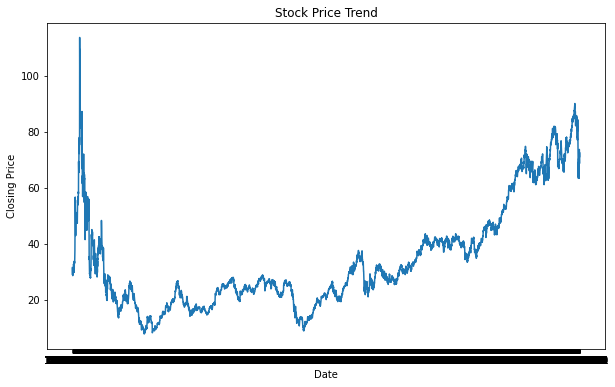

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Trend')
plt.show()

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

X = df[['Date_ordinal']]
y = df['Close']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1062.9150809549603


In [ ]:
### Conclusion
From this dataset, I was able to:
- Understand the meaning of Open, High, Low, Close, Adj Close, and Volume.
- Observe how the stock price moved over time.
- Calculate daily returns to see how volatile the stock was.
- Use moving averages to smooth out fluctuations and see long-term trends.

**Possible Extensions:**
- Compare this stock with other stocks or indices.
- Build a simple trading strategy using moving averages (MA crossovers).
- Use more advanced methods like volatility analysis or predictive models.


In [1]:
import os
print(os.getcwd())


C:\Users\sonal
